# Data Prepocessing

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sb
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
colors = [cm.viridis(x) for x in range(100)]

## Import data

In [2]:
data = pd.read_csv("titanic-passengers.csv",sep=';')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


## Preprocess 

In [3]:
# detect NaNs
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# describe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


As shown, there are many NaN entries in *Cabin* and *Age* columns. Cabin is a categorical feature so will be filled with the most frequent entry, same deal with *Embarked*. However, *Age* is a numerical feature, it's useful to fill NaNs with the mean value.

In [5]:
data['Cabin'].fillna(0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
Mostfreq=data.Embarked.value_counts().index[0]
data['Embarked'].fillna(Mostfreq,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [7]:
one_hot = pd.get_dummies(data.Embarked)
#join one hot encoder
data = data.join(one_hot)
#drop column Embarked
data.drop('Embarked',axis=1, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,0,0,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,0,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,0,0,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,0,0,0,1
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,1,0,0
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,0,1,0,0
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,0,0,0,1
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,0,0,0,1


In [8]:
data['Age']= pd.to_numeric(data['Age'],errors='coerce',downcast="float")
data['Age'].fillna(data['Age'].mean(),inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,0,0,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,0,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,0,0,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,0,0,0,1
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,0,1,0,0
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,0,1,0,0
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,0,0,0,1
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,0,0,0,1


In [9]:
SurvivedDict = {
    "Survived":{"No":0,"Yes":1}
}
data.replace(SurvivedDict,inplace=True)

In [10]:
SexDict = {
    "Sex":{"male":0,"female":1}
}
data.replace(SexDict,inplace=True)

In [11]:
data['Fam'] = data['Parch'] + data['SibSp']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float32
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  C            891 non-null    uint8  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
 14  Fam          891 non-null    int64  
dtypes: float32(1), float64(1), int64(7), object(3), uint8(3)
memory usage: 82.8+ KB


In [12]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,Fam
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,0,0,0,1,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,0,0,1,0
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,0,0,0,1,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,0,0,0,1,4
4,672,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,0,1,0,0,1
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,0,1,0,0,0
888,535,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,0,0,0,1,0
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,0,0,0,1,0


## Visualize

Now let's plot the destribution of some features to explore the data in depth.

<AxesSubplot:xlabel='Survived', ylabel='Count'>

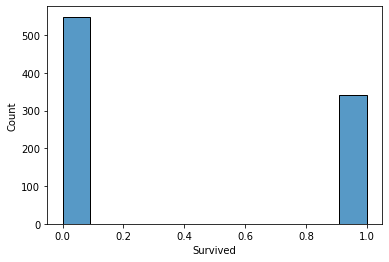

In [13]:
sb.histplot(data = data['Survived'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

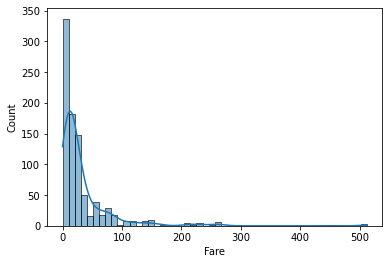

In [14]:
sb.histplot(data = data['Fare'],kde=True,bins=50)

<AxesSubplot:xlabel='Fam', ylabel='Count'>

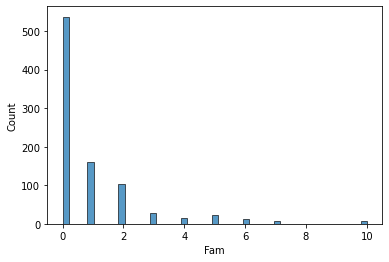

In [15]:
sb.histplot(data = data['Fam'])

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

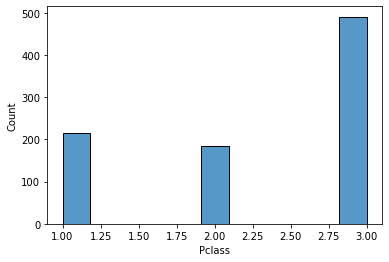

In [16]:
sb.histplot(data = data['Pclass'])

Text(0.5, 1.0, 'Age distribution')

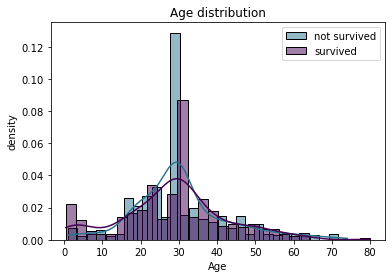

In [17]:
Age_fig,Age_ax1 =  plt.pyplot.subplots()
sb.histplot(data = data['Age'][data.Survived==0],kde=True,bins=30,label="not survived",color=colors[99],stat="density")
sb.histplot(data = data['Age'][data.Survived==1],kde=True,bins=30,label="survived",color=colors[0],stat="density")
plt.pyplot.legend()
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('density')
Age_ax1.set_title('Age distribution')

C:\Users\omarb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\omarb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Age Vs Sex: Who Survived')

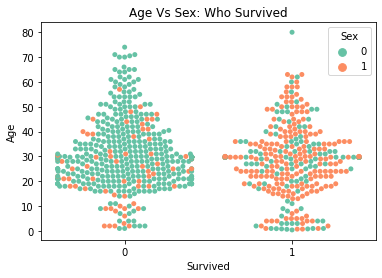

In [18]:
fig1, ax1 =  plt.pyplot.subplots()
fig1 = sb.swarmplot(x=data.Survived, y=data.Age, data=data,hue="Sex",palette="Set2")
fig1.figsize = (10,20)
ax1.set_title('Age Vs Sex: Who Survived')

Text(0.5, 1.0, 'Age distribution')

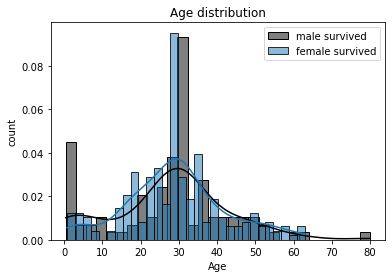

In [19]:
fig1, ax1=plt.pyplot.subplots()
sb.histplot(data = data['Age'][(data.Survived==1) & (data.Sex==0)],
            kde=True,bins=30,label="male survived",color='black',stat="density")
sb.histplot(data = data['Age'][(data.Survived==1) & (data.Sex==1)],
            kde=True,bins=30,label="female survived",palette="grey",stat="density")
plt.pyplot.legend()
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('count')
ax1.set_title('Age distribution')

Text(0.5, 1.0, 'Age distribution')

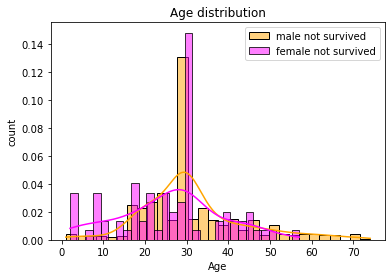

In [20]:
fig1, ax1 = plt.pyplot.subplots()
sb.histplot(data = data['Age'][(data.Survived==0) & (data.Sex==0)],
            kde=True,bins=30,label="male not survived",color='orange',stat="density")
sb.histplot(data = data['Age'][(data.Survived==0) & (data.Sex==1)],
            kde=True,bins=30,label="female not survived",color="magenta",stat="density")
plt.pyplot.legend()
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('count')
ax1.set_title('Age distribution')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Survived passengers distribution')

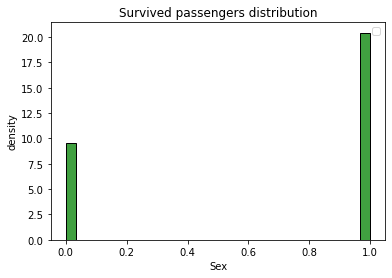

In [21]:
fig1, ax1 = plt.pyplot.subplots()
sb.histplot(data = data['Sex'][(data.Survived==1)],
            kde=False,bins=30,color='green',stat="density")
plt.pyplot.legend()
plt.pyplot.xlabel('Sex')
plt.pyplot.ylabel('density')
ax1.set_title('Survived passengers distribution')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Unfortunate passengers distribution')

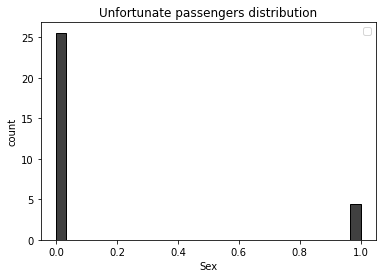

In [22]:
fig1, ax1 = plt.pyplot.subplots()
sb.histplot(data = data['Sex'][(data.Survived==0)],
            kde=False,bins=30,color='black',stat="density")
plt.pyplot.legend()
plt.pyplot.xlabel('Sex')
plt.pyplot.ylabel('count')
ax1.set_title('Unfortunate passengers distribution')

Appearently, there is correlation between Age/Sex and if the passenger has survived, which is very logic. Age and Sex are independant variables but in this case, they can decide whether the passenger can survive or not. Female individuals ('0') who are between 10 and 60 are more likely to survive. Very few male passenger ('1') did make it, most of them are under 25 years. Later, we will explore more this correlation with more metric precision.

Let's try to study the impact of other feature on the survival of the individuals.

C:\Users\omarb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\omarb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Family size and Survival')

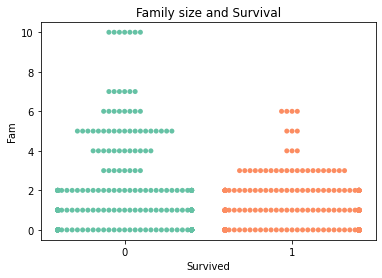

In [23]:
fig2, ax2 =  plt.pyplot.subplots()
fig2 = sb.swarmplot(y=data.Fam, x=data.Survived, data=data,palette="Set2")
fig2.figsize = (10,20)
ax2.set_title('Family size and Survival')

In this plot, it can be shown that passengers who had 4 other family members and more, had less chance to survive.

C:\Users\omarb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\omarb\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Pclass and Survival')

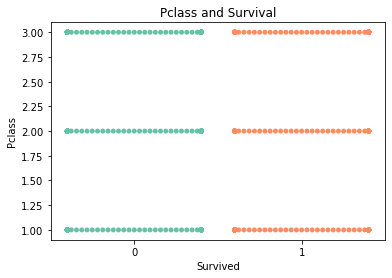

In [24]:
fig2, ax2 =  plt.pyplot.subplots()
fig2 = sb.swarmplot(y=data.Pclass, x=data.Survived, data=data,palette="Set2")
fig2.figsize = (10,20)
ax2.set_title('Pclass and Survival')

Text(0.5, 1.0, 'Pclas distribution')

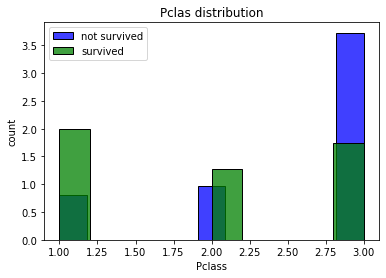

In [25]:
fig3, ax3=plt.pyplot.subplots()
sb.histplot(data = data['Pclass'][(data.Survived==0)],
            kde=False,label="not survived",color='blue',stat="density")
sb.histplot(data = data['Pclass'][(data.Survived==1)],
            kde=False,label="survived",color="green",stat="density")
plt.pyplot.legend()
plt.pyplot.xlabel('Pclass')
plt.pyplot.ylabel('count')
ax3.set_title('Pclas distribution')

Text(0.5, 1.0, 'Fare distribution')

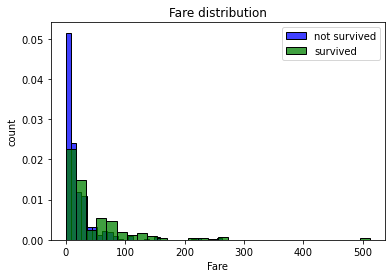

In [26]:
fig3, ax3=plt.pyplot.subplots()
sb.histplot(data = data['Fare'][(data.Survived==0)],
            kde=False,bins=30,label="not survived",color='blue',stat="density")
sb.histplot(data = data['Fare'][(data.Survived==1)],
            kde=False,bins=30,label="survived",color="green",stat="density")
plt.pyplot.legend()
plt.pyplot.xlabel('Fare')
plt.pyplot.ylabel('count')
ax3.set_title('Fare distribution')

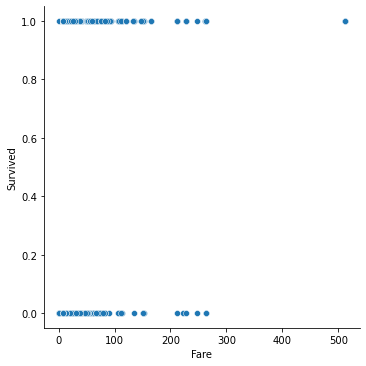

In [27]:
sb.relplot(x=data.Fare,y=data.Survived)

In [28]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.pyplot.subplots(figsize=(12,10))
    cmap = sb.diverging_palette(220,10,as_cmap = True)
    s = sb.heatmap(corr,cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,
                   annot = True,annot_kws = { 'fontsize' : 12 })

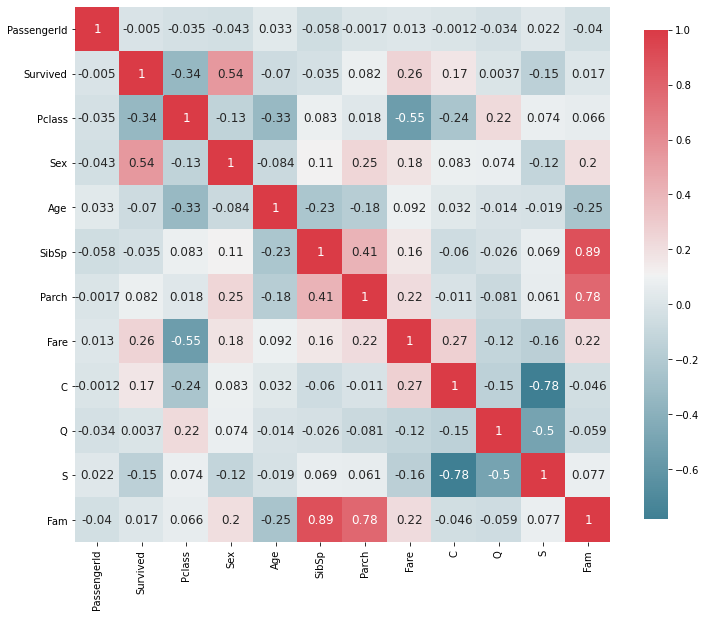

In [29]:
plot_correlation_map(data)

In [30]:
Class = data[['Pclass','Survived']].groupby(data.Pclass,group_keys=True).mean()
Class

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


In [31]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                     "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                    }

In [32]:
def title(str):
    ch = str.split(',')
    title = ch[1].split()
    return title[0][:-1]

In [33]:
title('Collander, Mr. Erik Gustaf')

'Mr'

In [57]:
data['Title'] = pd.Series(list(map(title,data.Name)))

In [118]:
data['Title'].update(pd.Series(Title_Dictionary))
Title = data[['Survived']].groupby(data.Title,group_keys=True,as_index=True,sort=True).count()

Title

,Survived
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,182
Mlle,2


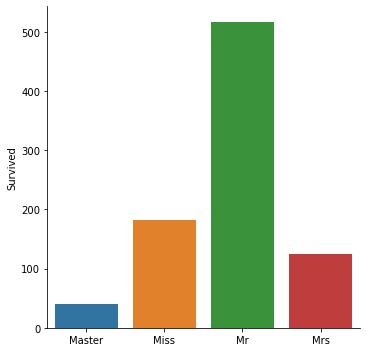

In [119]:
sb.catplot(x=Title[Title.Survived>10].index,y='Survived',data=Title[Title.Survived>10],kind="bar")